In [1]:
# Ignorar avisos 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Lendo o arquivo CSV
df = pd.read_csv("Salary Data.csv")

# Imprimindo a forma do DataFrame
print('O dataset possui',df.shape[0], 'registros e', df.shape[1], 'atributos.')

# Exibindo o DataFrame
df.head()


O dataset possui 6704 registros e 6 atributos.


Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0

In [5]:
#Obtendo as informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [6]:
#Verificando duplicatas
df.duplicated().sum()

4912

In [7]:
#Verificando se a nulos
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [8]:
round((df.isnull().sum()/df.shape[0])*100,3)

Age                    0.030
Gender                 0.030
Education Level        0.045
Job Title              0.030
Years of Experience    0.045
Salary                 0.075
dtype: float64

In [9]:
df[df["Age"].isna()]

Age Gender Education Level Job Title  Years of Experience  Salary
172  NaN    NaN             NaN       NaN                  NaN     NaN
260  NaN    NaN             NaN       NaN                  NaN     NaN

In [10]:
# Como há poucos nulos e eles estão presentes em todas as colunas, é possível usar o método de eliminação de linhas 
df.dropna(inplace=True)
# Eliminando os valoes duplicados 
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1787 non-null   float64
 1   Gender               1787 non-null   object 
 2   Education Level      1787 non-null   object 
 3   Job Title            1787 non-null   object 
 4   Years of Experience  1787 non-null   float64
 5   Salary               1787 non-null   float64
dtypes: float64(3), object(3)
memory usage: 97.7+ KB


In [11]:
#Extraindo estatiticas
df.describe().T

count           mean           std    min      25%  \
Age                  1787.0      35.139899      8.213045   21.0     29.0   
Years of Experience  1787.0       9.156128      6.844924    0.0      3.0   
Salary               1787.0  113184.659765  51596.536766  350.0  70000.0   

                          50%       75%       max  
Age                      33.0      41.0      62.0  
Years of Experience       8.0      13.0      34.0  
Salary               110000.0  160000.0  250000.0

In [12]:
df.nunique()

Age                     41
Gender                   3
Education Level          7
Job Title              191
Years of Experience     37
Salary                 444
dtype: int64

In [13]:
# Selecionando apenas as colunas numérica
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Percorrendo cada coluna numérica do DataFrame
for col in numeric_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')


Coluna: Age
29.0    106
27.0    104
28.0    104
33.0    104
31.0    102
Name: Age, dtype: int64


Coluna: Years of Experience
2.0    151
3.0    142
1.0    126
4.0    124
8.0    105
Name: Years of Experience, dtype: int64


Coluna: Salary
120000.0    76
40000.0     59
140000.0    56
180000.0    55
55000.0     55
Name: Salary, dtype: int64




In [14]:
#Transformando os numerais em inteiros
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    df[col] = df[col].astype(int)

#Verificando se a conversão foi realizada
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1787 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1787 non-null   int32 
 1   Gender               1787 non-null   object
 2   Education Level      1787 non-null   object
 3   Job Title            1787 non-null   object
 4   Years of Experience  1787 non-null   int32 
 5   Salary               1787 non-null   int32 
dtypes: int32(3), object(3)
memory usage: 76.8+ KB


In [15]:
# Selecionando apenas as colunas textuais
text_columns = df.select_dtypes(include=[np.object]).columns

# Percorrendo cada coluna textual do DataFrame
for col in text_columns:
    print(f'Coluna: {col}')
    print(df[col].value_counts().iloc[:5])
    print('\n')

    

Coluna: Gender
Male      966
Female    814
Other       7
Name: Gender, dtype: int64


Coluna: Education Level
Bachelor's Degree    506
Master's Degree      446
PhD                  340
Bachelor's           262
Master's             122
Name: Education Level, dtype: int64


Coluna: Job Title
Software Engineer Manager    127
Full Stack Engineer          122
Senior Software Engineer      96
Senior Project Engineer       95
Back end Developer            81
Name: Job Title, dtype: int64




In [16]:
# a dispersão e a forma da distribuição de um conjunto de dados, excluindo os valores NaN.
df_describe = df.describe()

# A amplitude é a diferença entre o valor máximo e mínimo. 
df_describe.loc['amp'] = df_describe.loc['max'] - df_describe.loc['min'] 

# O coeficiente de variação (CV) é uma medida da variabilidade relativa em relação à média.
df_describe.loc['cv'] = (df_describe.loc['std'] / df_describe.loc['mean'] ).abs() *100

# A assimetria é uma medida estatística para avaliar a assimetria na distribuição dos dados.
df_describe.loc['skewness'] = df.skew()

# Calculando o IQR para cada coluna numérica
df_describe.loc['IQR'] = df_describe.loc['75%'] - df_describe.loc['25%']

# Por fim, o código arredonda os valores para duas casas decimais e transpõe o DataFrame para melhor visualização.
df_describe.round(2).T

count       mean       std    min      25%       50%  \
Age                  1787.0      35.14      8.21   21.0     29.0      33.0   
Years of Experience  1787.0       9.15      6.85    0.0      3.0       8.0   
Salary               1787.0  113184.66  51596.54  350.0  70000.0  110000.0   

                          75%       max       amp     cv  skewness      IQR  
Age                      41.0      62.0      41.0  23.37      0.67     12.0  
Years of Experience      13.0      34.0      34.0  74.83      0.90     10.0  
Salary               160000.0  250000.0  249650.0  45.59      0.08  90000.0

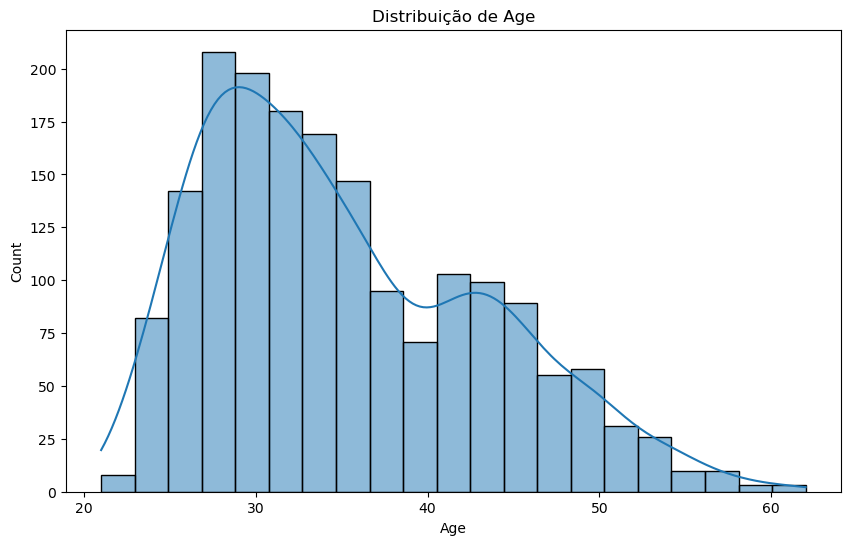

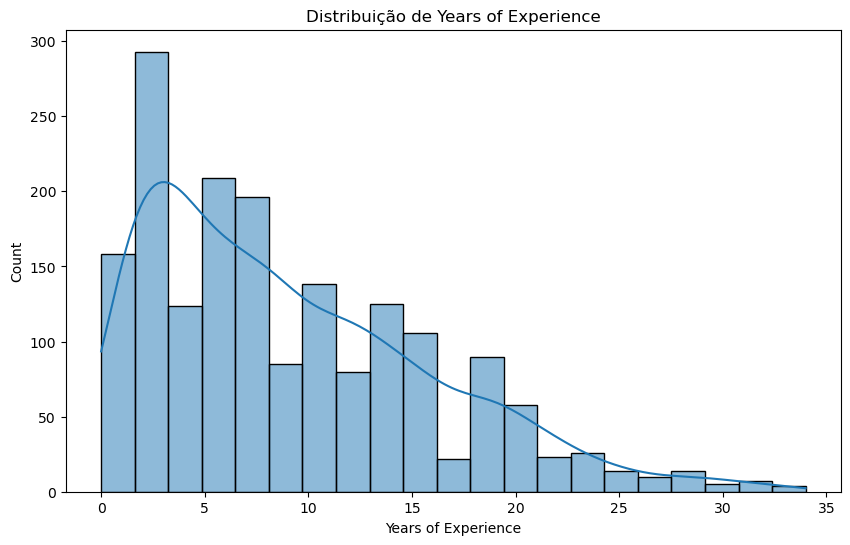

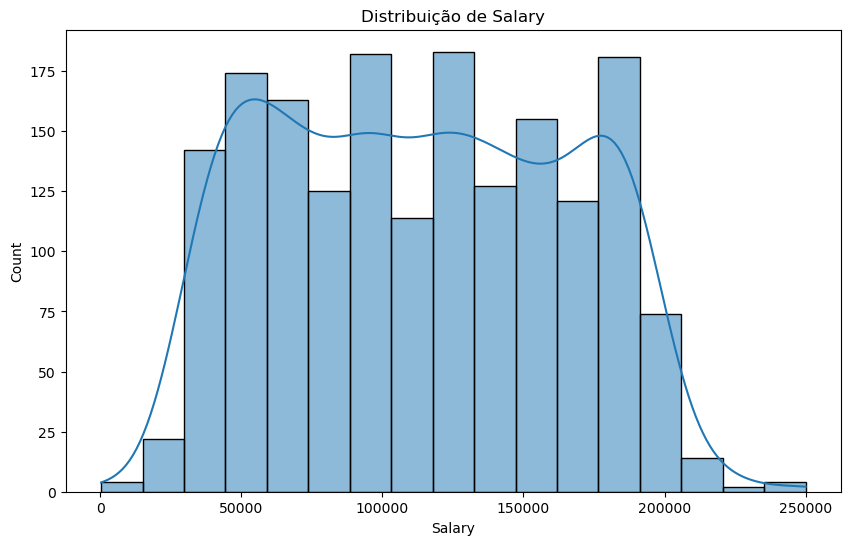

In [17]:
# Selecionando apenas as colunas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()


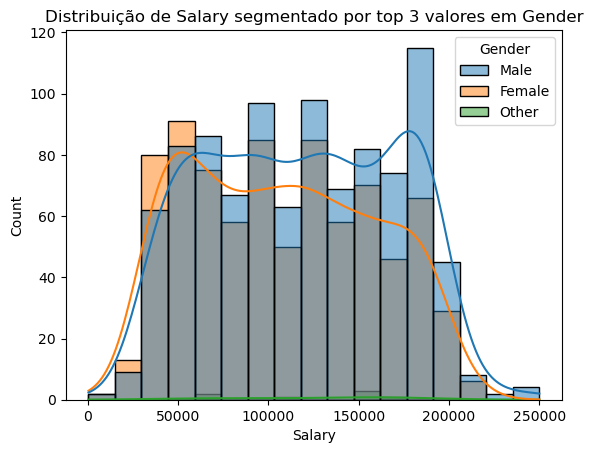

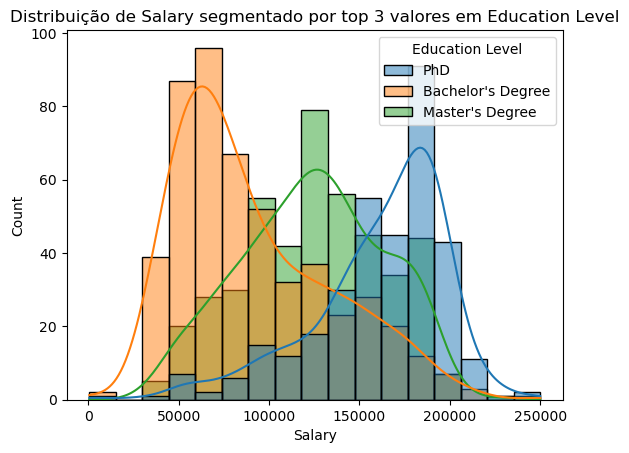

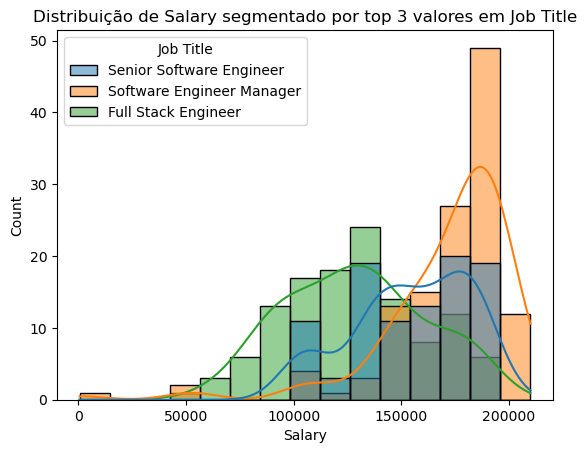

In [18]:
for col in text_columns:
    # Selecionando os top 3 valores
    top_3_values = df[col].value_counts().index[:3]

    # Filtrando o DataFrame original para incluir apenas as linhas que correspondem aos 3 principais valores
    df_top_3 = df[df[col].isin(top_3_values)]

    # Criando o gráfico de densidade de kernel
    sns.histplot(data=df_top_3, x="Salary", hue=col, kde=True)
    plt.title(f'Distribuição de Salary segmentado por top 3 valores em {col}')
    plt.show()




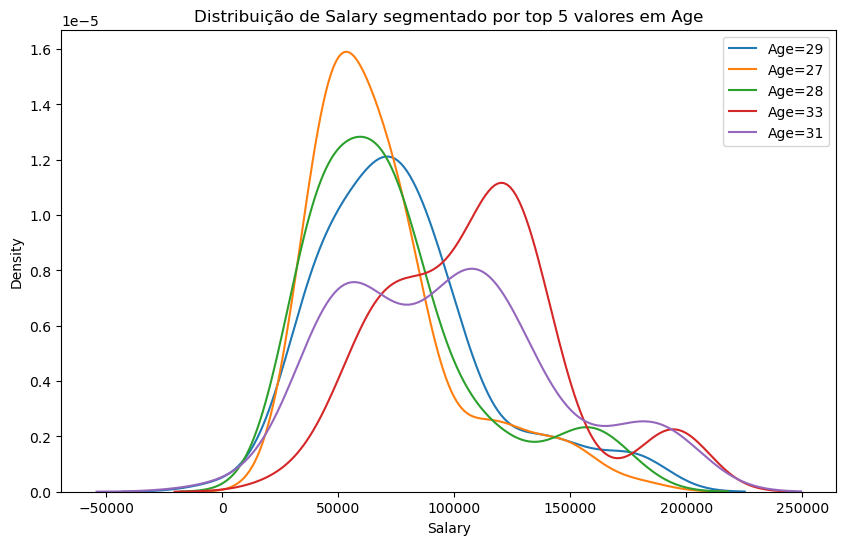

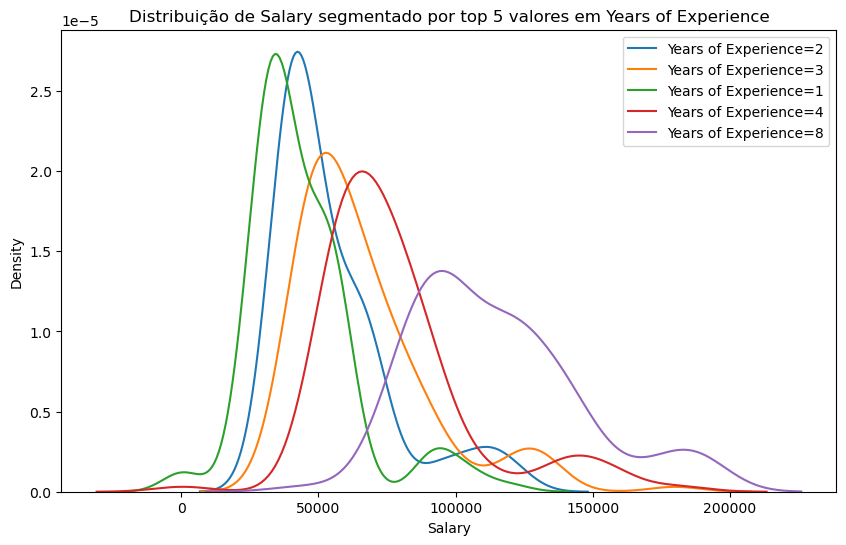

In [19]:
# Selecionando apenas as colunas numéricas, excluindo a coluna 'Salary'
numeric_columns_salary = df.select_dtypes(include=[np.number]).columns.drop('Salary')

for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_5_values = df[col].value_counts().index[:5]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_5 = df[df[col].isin(top_5_values)]

    # Criando o gráfico de densidade de kernel
    plt.figure(figsize=(10, 6))
    for value in top_5_values:
        sns.kdeplot(data=df_top_5[df_top_5[col] == value], x='Salary', label=f'{col}={value}')
    plt.title(f'Distribuição de Salary segmentado por top 5 valores em {col}')
    plt.legend()
    plt.show()



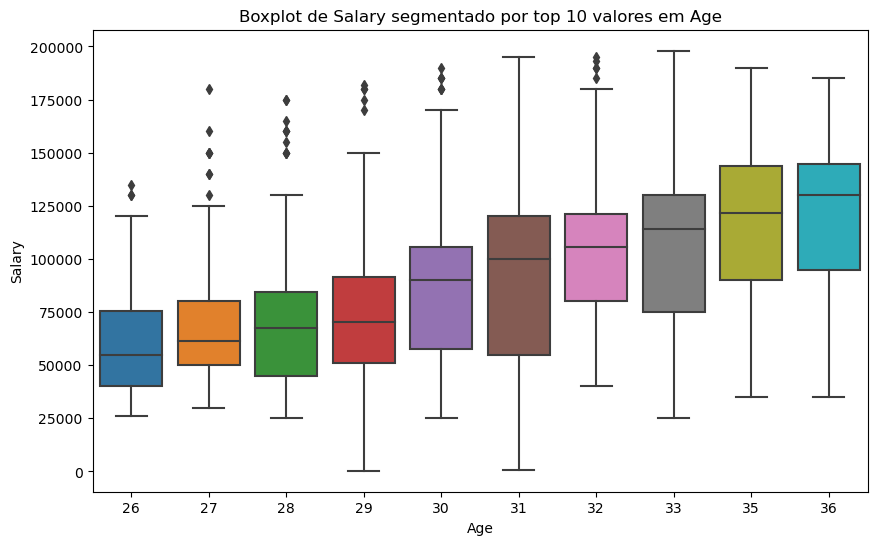

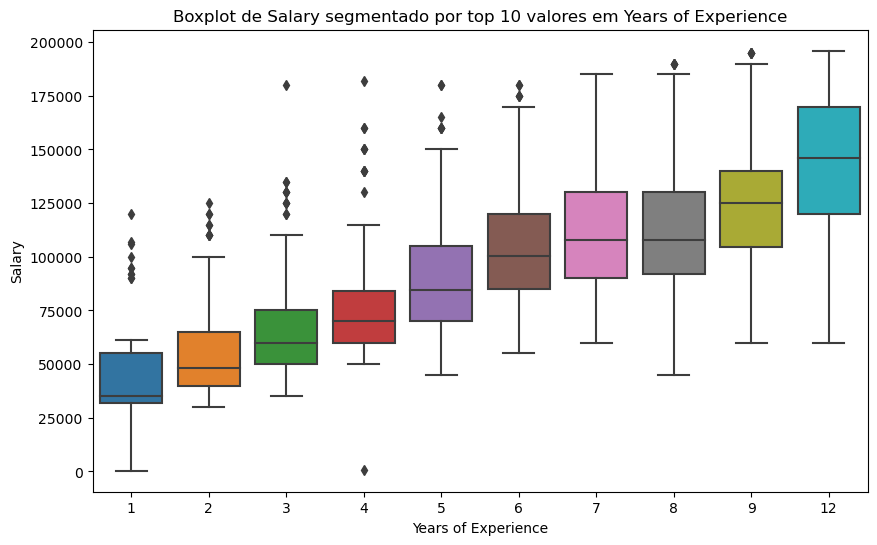

In [20]:
for col in numeric_columns_salary:
    # Selecionando os top 5 valores
    top_10_values = df[col].value_counts().index[:10]

    # Criando um novo DataFrame com apenas os top 5 valores
    df_top_10 = df[df[col].isin(top_10_values)]

    # Criando o boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='Salary', data=df_top_10)
    plt.title(f'Boxplot de Salary segmentado por top 10 valores em {col}')
    plt.show()



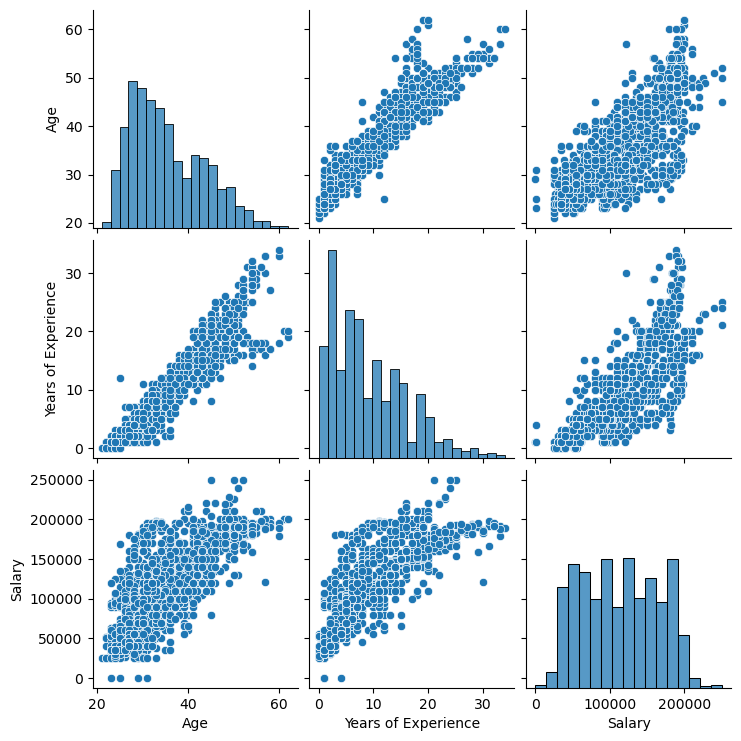

In [21]:
sns.pairplot(df);

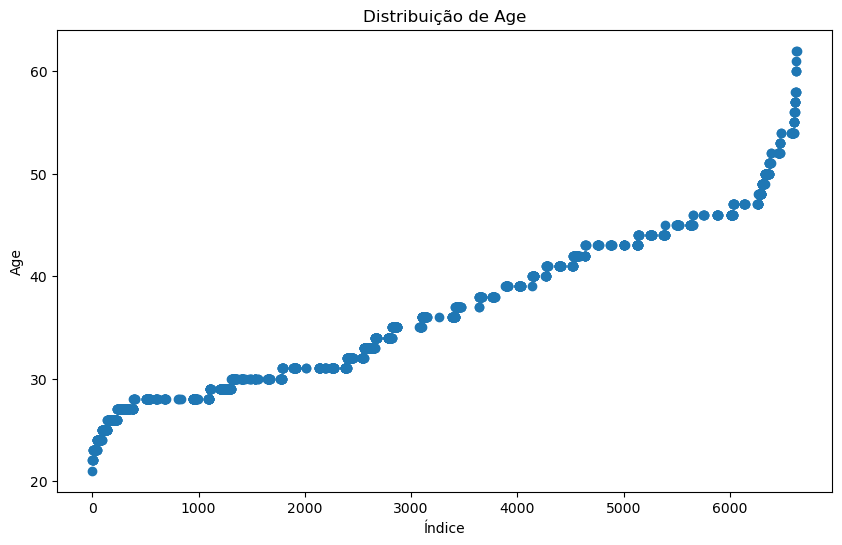

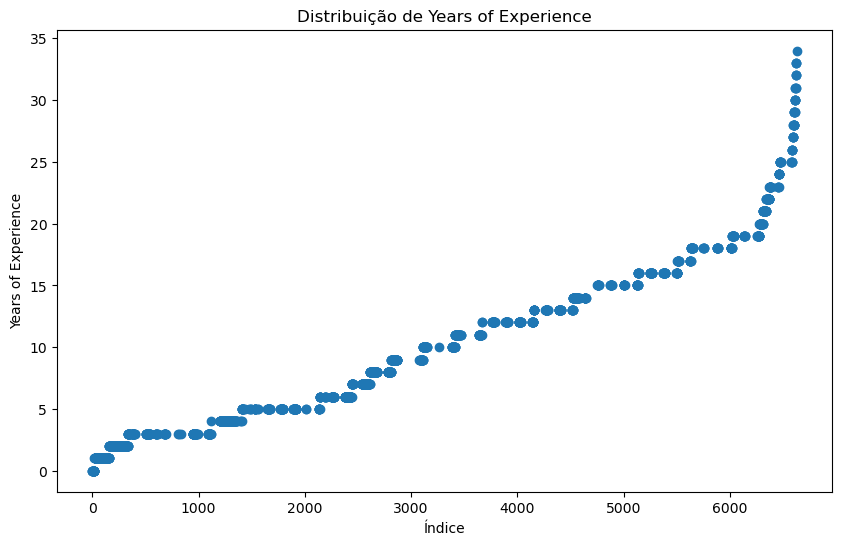

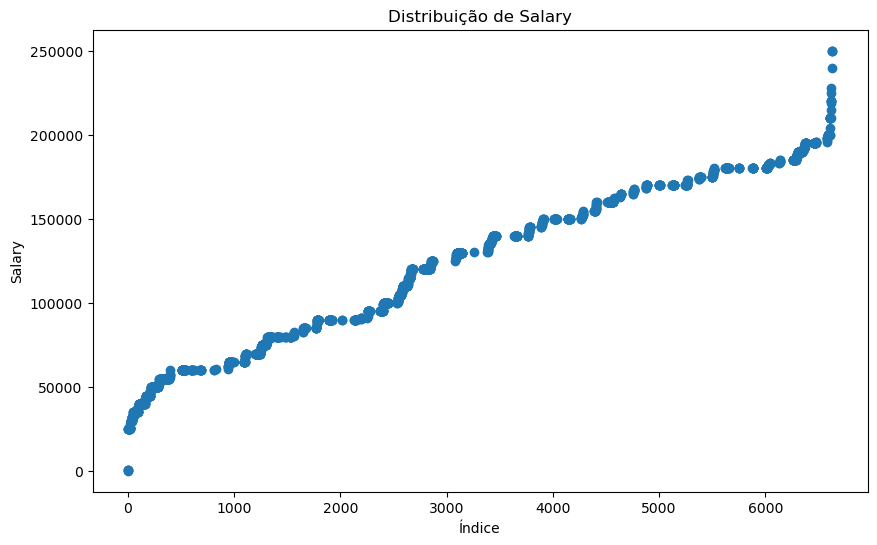

In [22]:
# Identificar colunas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Ordenar cada coluna
df_sorted = df[numeric_cols].apply(lambda x: x.sort_values().values)

# Criação do gráfico de dispersão
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    plt.scatter(df_sorted.index, df_sorted[col])
    plt.title(f'Distribuição de {col}')
    plt.xlabel('Índice')  # Rótulo do eixo x
    plt.ylabel(col)  # Rótulo do eixo y
    plt.show()


In [23]:
for col in numeric_cols:
    fig = px.box(df, y=col)
    fig.update_layout(title_text=f'Boxplot de {col}')
    fig.show()

<AxesSubplot:>

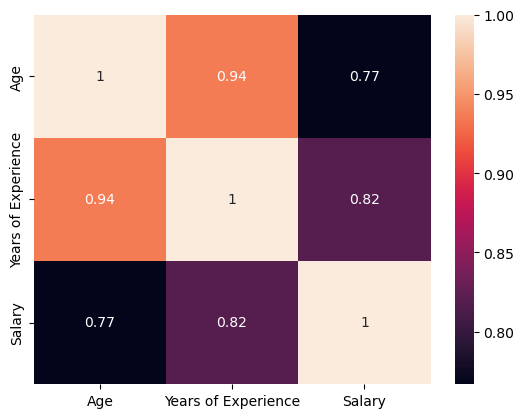

In [24]:
sns.heatmap(df.corr(), annot=True)